In [1]:
#python specific stuff
import numpy as np
import matplotlib.pyplot as plt
import time


In [13]:
#cell heat transfer equation
#wall is divided into cells with heat transfer between each

def calculate_Qout_conductive(U,area_cell,T1,T2,length_cell):
    Qout=U*area_cell*(T1-T2)/length_cell
    return Qout

def calculate_Tchange(Qin,Qout,t_step,densityC,volume_cell):
    DT=(Qin-Qout)*t_step/(densityC*volume_cell)
    return DT

def calculate_Qout_convective(HTC,area_cell,T1,T2):
    Qout=HTC*area_cell*(T1-T2)
    return Qout
 
    


0

In [37]:
 #initialize constants for wall, room, floor, ceiling
U=0.1
U_floor=0.2
HTC=10
densityC=494000


#time 
t_step=6#s
N_t_steps=20000
t_final=t_step*N_t_steps
#distance
N_cells=20
length_cell=0.01
area_cell=1
volume_cell=area_cell*length_cell
wall_length=N_cells*length_cell

#build inital conditions for array of wall cells, 
inital_T=10 #deg C
T_wall_tarray=np.full([N_cells],inital_T)
T_ceil_tarray=np.full([N_cells],inital_T)
T_floor_tarray=np.full([N_cells],inital_T)
T_room=inital_T

#data array to hold all data, axis 1 is x-position, 2 is time step
data_array_T_room=np.zeros(N_t_steps)
data_array_T_wall=np.zeros(N_t_steps)
data_array_T_ceil=np.zeros(N_t_steps)
data_array_T_floor=np.zeros(N_t_steps)
calculate_Qout_convective(HTC,1,1,1)
calculate_Qout_convective(HTC,area_cell,T_room,T_wall_tarray[0])

0

In [38]:
#now do calculation - this may take some time
#indexing of array begins at 0
Qin_room=10 # some constant value set by heaters
#Qin_room=np.arange(0,N_t_steps*t_step,t_step)/(60*60)

Qin_wall_xarray=np.zeros(N_cells-1)
Qin_floor_xarray=np.zeros(N_cells-1)
Qin_ceil_xarray=np.zeros(N_cells-1)
#Qin_wall_xarray[0]=Qin

for t in range(N_t_steps):
    
    #calculate Qout and T change for room
    Qout_room_to_wall=calculate_Qout_convective(HTC,area_cell,T_room,T_wall_tarray[0])
    #print( Qout_room_to_wall)
    Qout_room_to_ceil=calculate_Qout_convective(HTC,area_cell,T_room,T_ceil_tarray[0])
    Qout_room_to_floor=calculate_Qout_convective(HTC,area_cell,T_room,T_floor_tarray[0])
    Qout_room_total=Qout_room_to_wall+Qout_room_to_ceil+Qout_room_to_floor
    #update T for next iteration
    T_room=T_room+calculate_Tchange(Qin_room,Qout_room_total,t_step,densityC,volume_cell)
    
    #calculate Qout for wall # put these outputs in loop maybe?
    Qout_wall_xarray=calculate_Qout_conductive(U,area_cell,T_wall_tarray[0:N_cells-1],T_wall_tarray[1:N_cells],length_cell)
    Qin_wall_xarray[0]=Qout_room_to_wall
    Qin_wall_xarray[1:N_cells-1]=Qout_wall_xarray[0:N_cells-2]
    T_wall_tarray=T_wall_tarray+np.append(calculate_Tchange(Qin_wall_xarray[0:N_cells-1],Qout_wall_xarray,t_step,densityC,volume_cell),[0]) 
    
     #calculate Qout for floor
    Qout_floor_xarray=calculate_Qout_conductive(U_floor,area_cell,T_floor_tarray[0:N_cells-1],T_floor_tarray[1:N_cells],length_cell)
    Qin_floor_xarray[0]=Qout_room_to_floor
    Qin_floor_xarray[1:N_cells-1]=Qout_floor_xarray[0:N_cells-2]
    T_floor_tarray=T_floor_tarray+np.append(calculate_Tchange(Qin_floor_xarray[0:N_cells-1],Qout_floor_xarray,t_step,densityC,volume_cell),[0]) 
    
     #calculate Qout for ceil
    Qout_ceil_xarray=calculate_Qout_conductive(U,area_cell,T_ceil_tarray[0:N_cells-1],T_ceil_tarray[1:N_cells],length_cell)
    Qin_ceil_xarray[0]=Qout_room_to_ceil
    Qin_ceil_xarray[1:N_cells-1]=Qout_ceil_xarray[0:N_cells-2]
    T_ceil_tarray=T_ceil_tarray+np.append(calculate_Tchange(Qin_ceil_xarray[0:N_cells-1],Qout_ceil_xarray,t_step,densityC,volume_cell),[0]) 
    
    data_array_T_room[t]=T_room
    data_array_T_wall[t]=T_wall_tarray[0]
    data_array_T_floor[t]=T_floor_tarray[0]
    data_array_T_ceil[t]=T_ceil_tarray[0]
    
#print(Qout_ceil_xarray)

Text(0, 0.5, 'Temperature (C)')

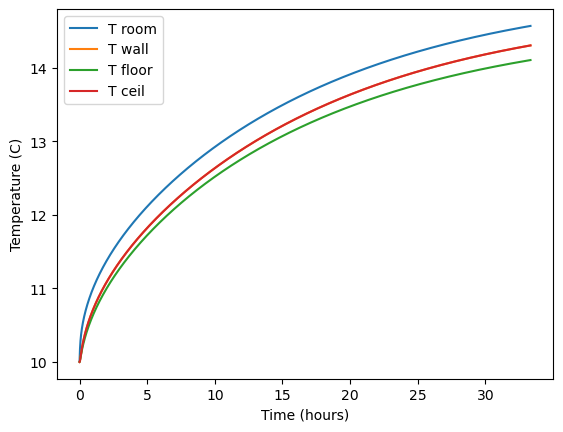

In [39]:

t_array=np.arange(0,N_t_steps*t_step,t_step)/(60*60)
plt.plot(t_array,data_array_T_room,label='T room')
plt.plot(t_array,data_array_T_wall,label='T wall')
plt.plot(t_array,data_array_T_floor,label='T floor')
plt.plot(t_array,data_array_T_ceil,label='T ceil')
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (C)')